In [ ]:
import numpy as np
import pandas as pd
import re
from datetime import datetime as dt
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

In [90]:
df_simple = pd.read_csv("D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Contingencia\\Datos\\Datos9.csv")
df_simple["Fecha"] = pd.to_datetime(df_simple["Fecha"])
df_simple.set_index("Fecha", drop=True, inplace=True)

In [91]:
df_simple.head()

,PM01 [ug/m3],PM2_5 [ug/m3],PM10 [ug/m3],CO [ppm],O3 [ppm],NH3 [ppm],NOx [ppm],NO2 [ppm],Temperatura [°C],Humedad [%HR]
Fecha,,,,,,,,,,
2024-02-27 00:07:00,15.94,21.21,36.38,2.99,175.74,0.44,0.70,208.56,28.70,72.87
2024-02-27 01:08:00,17.11,21.41,47.31,3.08,245.87,0.13,0.08,146.35,26.72,83.03
2024-02-27 02:09:00,9.66,20.79,45.86,3.40,263.91,0.21,0.09,149.40,25.25,88.93
2024-02-27 03:10:00,17.35,20.48,35.10,2.53,207.67,0.04,0.08,224.98,24.93,87.49
2024-02-27 04:11:00,19.29,20.21,35.50,2.51,171.80,0.03,0.13,208.91,25.35,87.81


In [71]:
def graphic(data=pd.DataFrame(), variable='CO', unit='ppm', labelsize=12,
            shape_figs=(1, 1), position=[0, 0], color='#056674', fig=None):
    """
    Generate one or more plots in a single mosaic.
    
    Arguments:
    * ``data`` : DataFrame with the data.
    * ``variable`` : Variable to plot.
    * ``unit`` : Units of the variable.
    * ``labelsize`` : Font size.
    * ``shape_figs`` : Shape of the figure matrix in the form i,j. Default is (1,1).
    * ``position`` : Position of the figure in the matrix in the form i,j. Default is [0,0].
    * ``color`` : Color of the time series curve. Default is #056674.
    * ``fig`` : Matplotlib figure object.
    
    Returns:
    * ``fig`` : Figure.
    """
    if fig is None:
        fig = plt.figure(figsize=(10, 6))

    gs = gridspec.GridSpec(shape_figs[0], shape_figs[1])

    ax1 = fig.add_subplot(gs[position[0], position[1]])

    minvar = data[variable].min()
    maxvar = data[variable].max()
    
    if minvar < 0:
        minvar = 0

    min_x = data[variable].idxmin()
    min_y = round(minvar, 2)
    
    max_x = data[variable].idxmax()
    max_y = round(maxvar, 2)

    ax1.scatter(min_x, min_y, c='k', label='Minimo')
    ax1.scatter(max_x, max_y, c='r', label='Maximo')

    ax1.annotate(f'{min_y}', xy=(min_x, min_y), xytext=(0, 10), textcoords="offset points", ha='center')
    ax1.annotate(f'{max_y}', xy=(max_x, max_y), xytext=(0, -15), textcoords="offset points", ha='center')

    ax1.plot(data.index, data[variable], '-', lw=1, label=variable, color=color)

    ax1.set_ylim([(minvar) * 0.99, (maxvar) * 1.01])
    ax1.set_xlim([data.index[0], data.index[-1]])

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax1.tick_params(axis='y', color='k', labelcolor='k', labelsize=labelsize)
    ax1.tick_params(axis='x', color='k', labelcolor='k', labelsize=labelsize)

    ax1.grid(which='major', linestyle='--', linewidth=0.5, color='lightgray')
    ax1.set_title(variable, fontsize=labelsize+3, color='k')
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))

    ax1.set_ylabel(f"{unit}", fontsize=labelsize, color='k')
    ax1.set_xlabel("Tiempo", fontsize=labelsize, color='k')
    
    plt.legend(loc=0)

    plt.grid(False)

    return fig

In [26]:
path_save = "D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Contingencia\\Graficas\\"

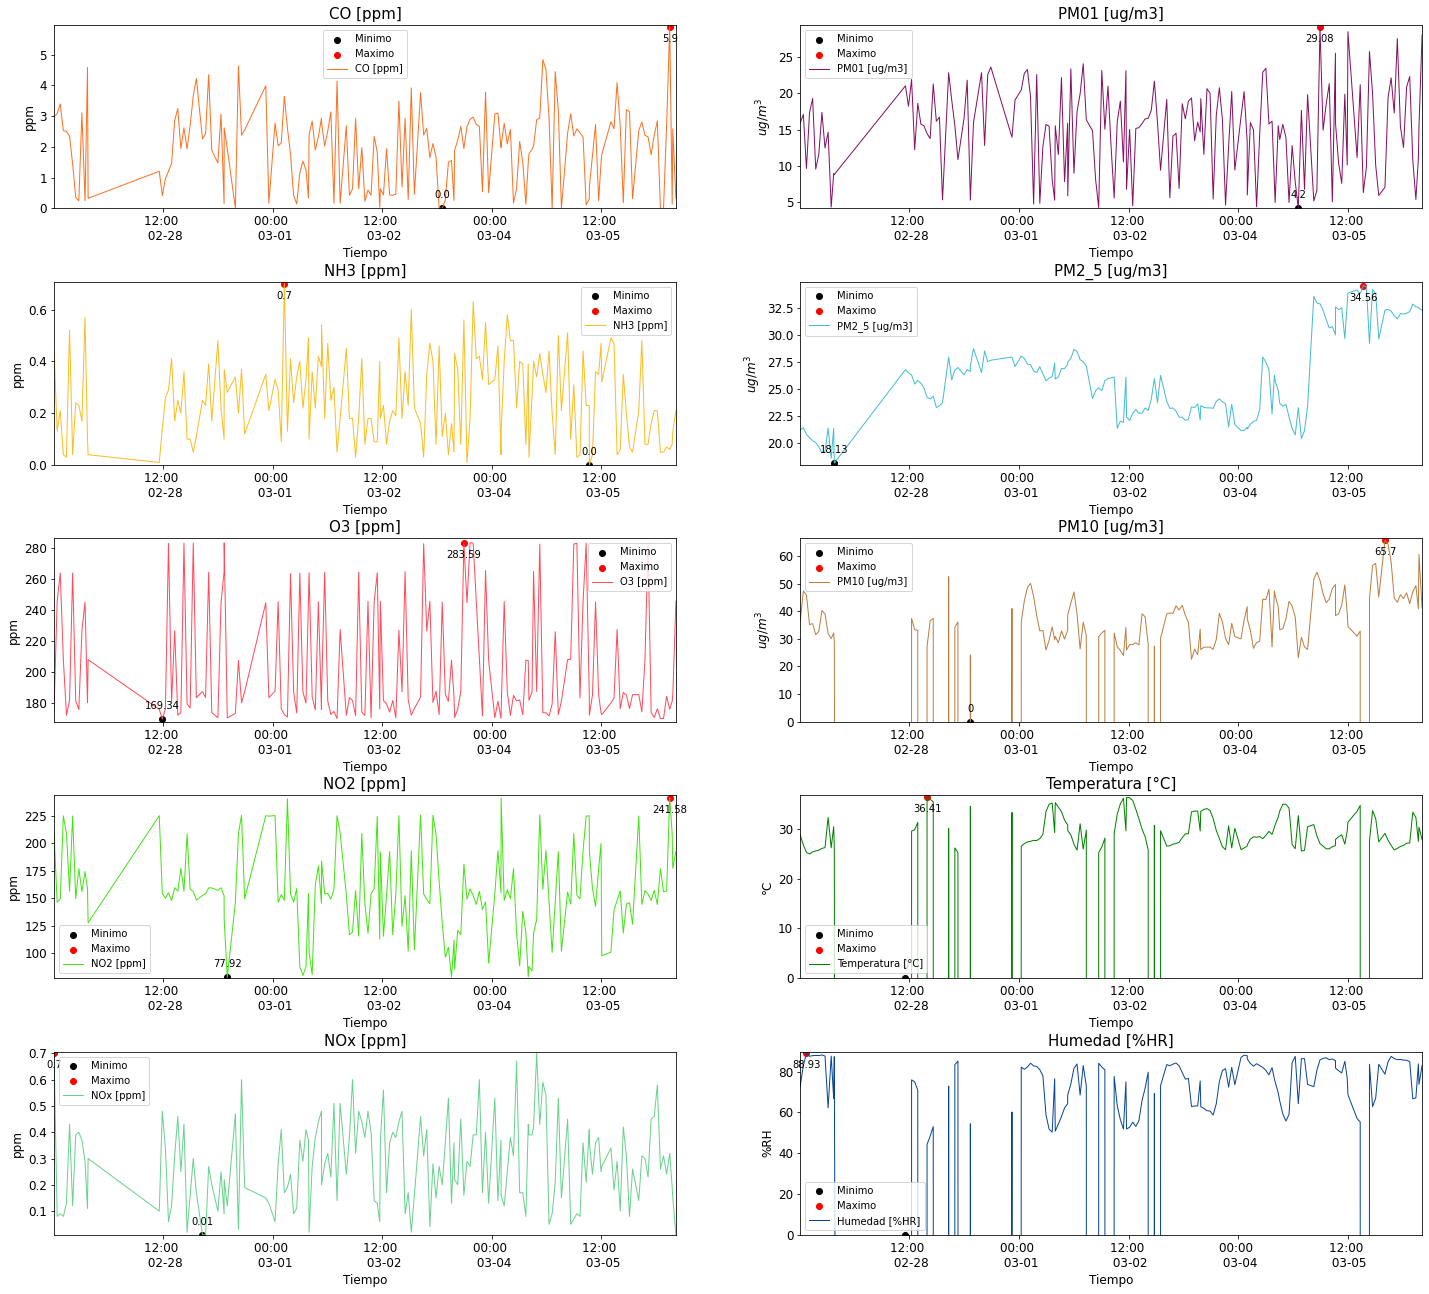

In [92]:
fig = plt.figure(figsize=(10,8))
# gs = gridspec.GridSpec(3,3)

serie_NOx=graphic(data=df_simple,variable='NOx [ppm]',unit=r'ppm',fig=fig, 
                              color='#69D18E', labelsize = 12,shape_figs = (5,2),position=[4,0])

serie_CO=graphic(data=df_simple,variable='CO [ppm]',unit=r'ppm',fig=fig,
                             color='#FB7122',labelsize = 12,shape_figs = (5,2),position=[0,0])

serie_O3=graphic(data=df_simple,variable='O3 [ppm]',unit=r'ppm',fig=fig,
                             color='#FF4B5C', labelsize = 12,shape_figs = (5,2),position=[2,0])

serie_NH3=graphic(data=df_simple,variable='NH3 [ppm]',unit=r'ppm',fig=fig,
                              color='#FBBD22', labelsize = 12,shape_figs=(5,2),position=[1,0])

serie_NO2=graphic(data=df_simple,variable='NO2 [ppm]',unit=r'ppm',fig=fig,
                              color='#43E313', labelsize = 12,shape_figs=(5,2),position=[3,0])

serie_temp=graphic(data=df_simple,variable='Temperatura [°C]',unit=r'°C',fig=fig,
                               color='green', labelsize = 12,shape_figs=(5,2),position=[3,1])

serie_hum=graphic(data=df_simple,variable='Humedad [%HR]',unit=r'%RH',fig=fig,
                              color='#084594', labelsize = 12,shape_figs=(5,2),position=[4,1])

serie_PM01=graphic(data=df_simple,variable='PM01 [ug/m3]',unit=r'$ug/m^3$',fig=fig,
                               color='#851162', labelsize = 12,shape_figs=(5,2),position=[0,1])

serie_PM2_5=graphic(data=df_simple,variable='PM2_5 [ug/m3]',unit=r'$ug/m^3$',fig=fig,
                                color='#44BDCE', labelsize = 12,shape_figs=(5,2),position=[1,1])

serie_PM10=graphic(data=df_simple,variable='PM10 [ug/m3]',unit=r'$ug/m^3$',fig=fig,
                               color='#BB7E40', labelsize = 12,shape_figs=(5,2),position=[2,1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.0,top=2.2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Caldas.jpg',bbox_inches="tight",dpi = 200)